In [27]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

fig_size = (8, 6)
font_size = 14

## Task 1 Static IMU experiment

The readings are very noisy

In [28]:
file_path = "Dataset/data/task1/imu_reading_task1.csv"
col_names = ['time_stamp', 'acc_x', 'acc_y', 'acc_z', 'roll', 'pitch', 
                'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']
data = pd.read_csv(file_path, names=col_names)
# data.head()

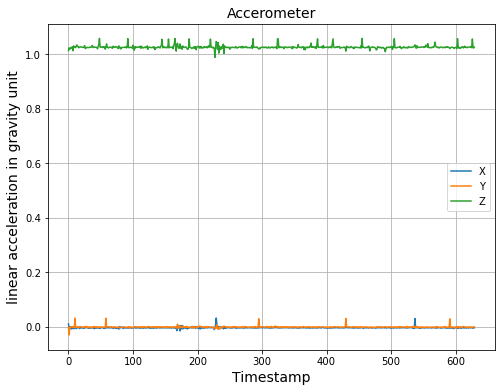

In [29]:
# task 1a plot the linear acceleration x,y,z
def plot_acc_xyz(data):
    plt.figure(figsize=fig_size)
    var_names = ['acc_x', 'acc_y', 'acc_z']
    for idx, name in enumerate(var_names):
        plt.plot(data[name])
    plt.ylabel("linear acceleration in gravity unit", fontsize=font_size)
    plt.xlabel("Timestamp", fontsize=font_size)
    plt.legend(["X", "Y", "Z"])
    plt.title("Accerometer", fontsize=font_size)
    plt.grid()
    plt.show()

plot_acc_xyz(data)

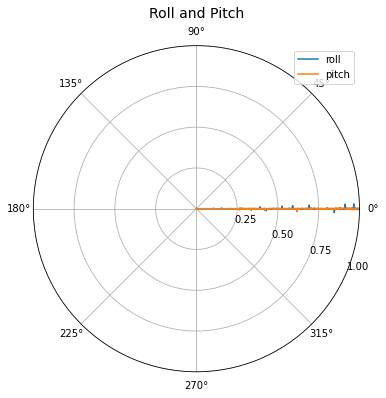

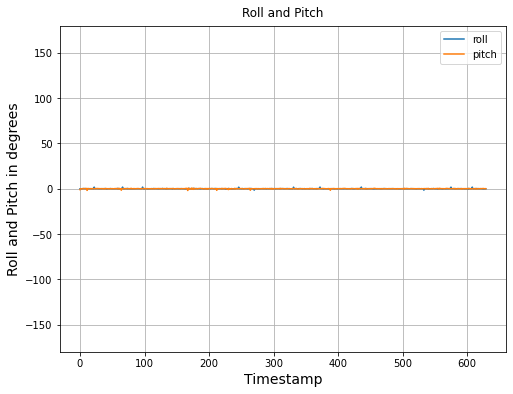

In [30]:
# task 1a plot roll and pitch
def plot_roll_pitch(data):
    r = np.linspace(0, 1, num=len(data["roll"]), endpoint=False)
    roll = np.array(data["roll"])
    roll_rad = [ np.radians(degree) for degree in roll]
    pitch = np.array(data["pitch"])
    pitch_rad = [np.radians(degree) for degree in pitch]

    plt.figure(figsize=fig_size)
    ax = plt.subplot(111, projection='polar')
    ax.plot(roll_rad, r, label='roll')
    ax.plot(pitch_rad, r, label='pitch')
    ax.set_rmax(1)
    ax.set_rticks([0.25, 0.5, 0.75, 1])  # Less radial ticks
    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax.grid(True)
    ax.legend(loc="best")
    ax.set_title("Roll and Pitch", va='bottom', fontsize=font_size)
    plt.show()

    plt.figure(figsize=fig_size)
    ax = plt.subplot(111)
    ax.plot(data["roll"], label='roll')
    ax.plot(data["pitch"], label='pitch')
    ax.set_ylim([-180, 180])
    ax.set_ylabel("Roll and Pitch in degrees", fontsize=font_size)
    ax.set_xlabel("Timestamp", fontsize=font_size)
    ax.grid(True)
    ax.legend()
    ax.set_title("Roll and Pitch", va='bottom')
    plt.show()
    
plot_roll_pitch(data)

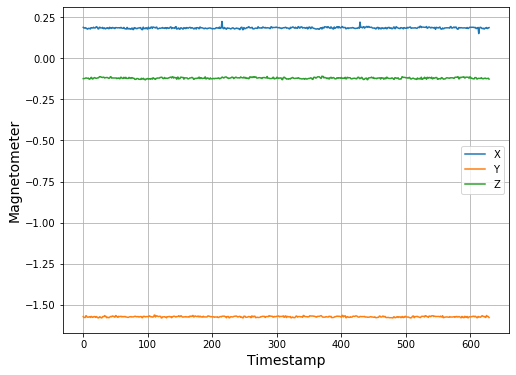

In [31]:
def plot_mag(data):
    plt.figure(figsize=fig_size)
    var_names = ['mag_x', 'mag_y', 'mag_z']
    for idx, name in enumerate(var_names):
        plt.plot(data[name])
    plt.ylabel("Magnetometer", fontsize=font_size)
    plt.xlabel("Timestamp", fontsize=font_size)
    plt.legend(["X", "Y", "Z"])
    plt.grid()
    plt.show()
plot_mag(data)

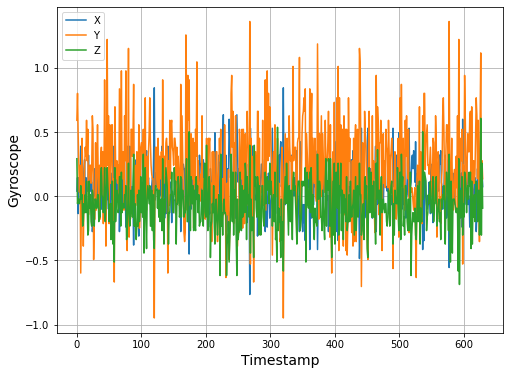

In [32]:
def plot_gyro(data):
    plt.figure(figsize=fig_size)
    var_names = ['gyro_x', 'gyro_y', 'gyro_z']
    for idx, name in enumerate(var_names):
        plt.plot(data[name])
    plt.ylabel("Gyroscope", fontsize=font_size)
    plt.xlabel("Timestamp", fontsize=font_size)
    plt.legend(["X", "Y", "Z"])
    plt.grid()
    plt.show()
plot_gyro(data)

In [33]:
# task 1b bias of the readings
data.mean(axis=0)[1:]

acc_x    -0.004566
acc_y    -0.001976
acc_z     1.025573
roll      0.009017
pitch     0.008025
gyro_x    0.085861
gyro_y    0.222109
gyro_z   -0.064656
mag_x     0.184669
mag_y    -1.572666
mag_z    -0.120576
dtype: float64

In [34]:
data.mean(axis=0)[1:].index

Index(['acc_x', 'acc_y', 'acc_z', 'roll', 'pitch', 'gyro_x', 'gyro_y',
       'gyro_z', 'mag_x', 'mag_y', 'mag_z'],
      dtype='object')

In [35]:
# task 1c the covariance matrix 
data.cov().iloc[1:, 1:]

,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
acc_x,6.905192e-06,5.270403e-07,4.233822e-07,0.000032,-0.000226,-0.000015,0.000027,5.786649e-07,2.117112e-07,4.063099e-07,7.535812e-08
acc_y,5.270403e-07,1.132814e-05,-5.756156e-07,0.000138,-0.000067,-0.000027,-0.000114,-6.204466e-05,2.831652e-07,4.461615e-07,3.998233e-07
acc_z,4.233822e-07,-5.756156e-07,4.158321e-05,-0.000075,0.000330,-0.000031,0.000237,1.877015e-04,-6.547399e-07,-2.299704e-07,1.792250e-06
roll,3.154584e-05,1.382902e-04,-7.520067e-05,0.068278,-0.007232,-0.003544,0.003306,2.571013e-04,1.071075e-05,1.790281e-05,4.141007e-05
pitch,-2.256033e-04,-6.699504e-05,3.296709e-04,-0.007232,0.058740,0.003337,0.000680,8.116794e-04,6.730988e-05,1.446948e-05,1.083746e-05
gyro_x,-1.451072e-05,-2.677677e-05,-3.084714e-05,-0.003544,0.003337,0.037426,-0.052586,-2.251944e-02,-1.977317e-05,-2.560185e-05,-6.755259e-05
gyro_y,2.697788e-05,-1.141753e-04,2.370003e-04,0.003306,0.000680,-0.052586,0.129979,4.734181e-02,1.596591e-05,5.052701e-05,6.283692e-05
gyro_z,5.786649e-07,-6.204466e-05,1.877015e-04,0.000257,0.000812,-0.022519,0.047342,3.740807e-02,7.150057e-05,5.372471e-05,3.706778e-05
mag_x,2.117112e-07,2.831652e-07,-6.547399e-07,0.000011,0.000067,-0.000020,0.000016,7.150057e-05,2.125977e-05,1.966616e-06,-1.768702e-07
mag_y,4.063099e-07,4.461615e-07,-2.299704e-07,0.000018,0.000014,-0.000026,0.000051,5.372471e-05,1.966616e-06,1.060677e-05,-6.369164e-07


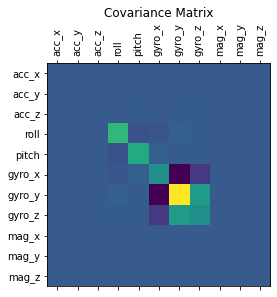

In [36]:
# gyro readings are correlated, pitch roll are correlated
var_names = col_names[1:]
plt.matshow(data.cov().iloc[1:, 1:])
plt.title("Covariance Matrix")
plt.xticks(ticks=np.arange(len(var_names)),labels=var_names, rotation="vertical")
plt.yticks(ticks=np.arange(len(var_names)),labels=var_names)
plt.show()

## Task 2 IMU calibration

The plot for acc_z does not seem right. 
Because we expect a part of it to be close to 1 and some other part close to -1

Actually not sure about what 2b is about

In [37]:
file_path = 'Dataset/data/task2/imu_calibration_task2.csv'
data = pd.read_csv(file_path, names=col_names)
data.head()

,time_stamp,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,1.605537e+09,-0.005368,-0.000366,1.023458,-0.075408,0.006361,-0.006562,-0.283797,-0.153177,-0.032154,-1.577317,-0.028208
1,1.605537e+09,-0.005124,-0.001220,1.025776,0.074755,0.108082,-0.111562,1.256203,-0.013177,-0.032154,-1.577317,-0.028208
2,1.605537e+09,-0.003782,-0.002074,1.026630,-0.165240,0.000647,-0.216562,0.626202,0.126823,-0.038147,-1.572786,-0.020462
3,1.605537e+09,-0.004636,0.002074,1.026020,0.149754,0.046846,-0.006562,-0.108798,0.126823,-0.034493,-1.573517,-0.028208
4,1.605537e+09,-0.005124,-0.000122,1.026996,-0.006969,0.080477,-0.216562,0.626202,0.196823,-0.034493,-1.573517,-0.028208


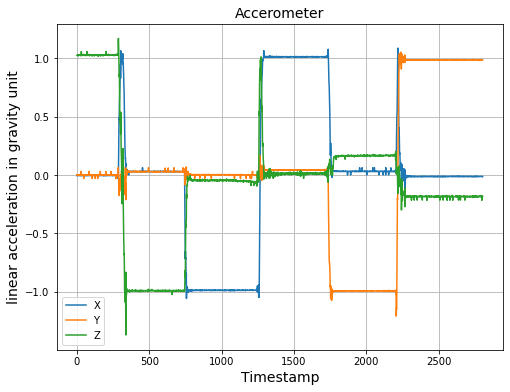

In [38]:
# task 2a
plot_acc_xyz(data)

In [39]:
def truncate(signal, prop = 0.05):
    trunc_len = round(prop*signal.size)
    return signal[trunc_len:-trunc_len]

def get_gain_bias(signal):
    # ki * [-1, 1] + bi = [au, ad]
    # => ki = (au - ad)/2, bi = (au + ad)/2
    up_signal = signal[signal >  0.8]
    dn_signal = signal[signal < -0.8]
    au = np.mean(truncate(up_signal))
    ad = np.mean(truncate(dn_signal))
    ki = (au - ad)/2
    bi = (au + ad)/2
    return ki, bi


In [40]:
kx, bx = get_gain_bias(data["acc_x"].to_numpy())
ky, by = get_gain_bias(data["acc_y"].to_numpy())
kz, bz = get_gain_bias(data["acc_z"].to_numpy())
gain_bias = np.array([[kx, ky, kz], [bx, by, bz]])
gain_bias

array([[ 0.99896299,  0.98877947,  1.00918849],
       [ 0.01128008, -0.00356882,  0.01849634]])

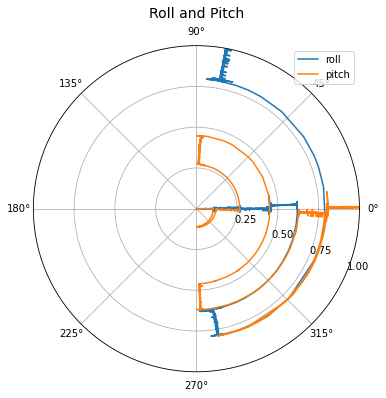

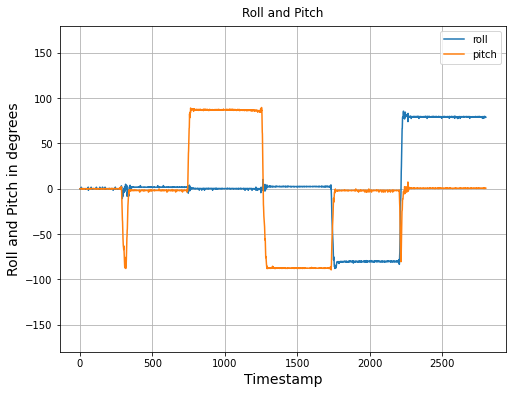

In [41]:
plot_roll_pitch(data)

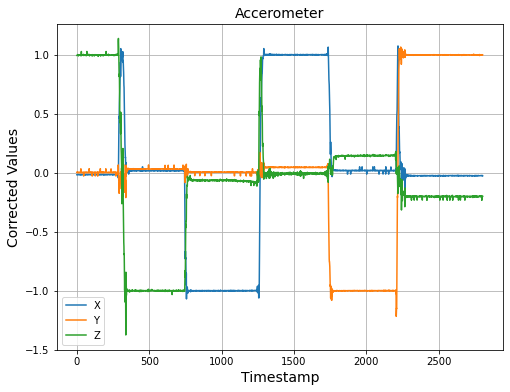

In [42]:
acc_x_calib = (data["acc_x"].to_numpy() - bx)/kx
acc_y_calib = (data["acc_y"].to_numpy() - by)/ky
acc_z_calib = (data["acc_z"].to_numpy() - bz)/kz
plt.figure(figsize=(8, 6))
plt.plot(acc_x_calib)
plt.plot(acc_y_calib)
plt.plot(acc_z_calib)
plt.xlabel("Timestamp", fontsize=font_size)
plt.ylabel("Corrected Values", fontsize=font_size)
plt.title("Accerometer", fontsize=font_size)
plt.legend(["X", "Y", "Z"])
plt.grid()
plt.show()

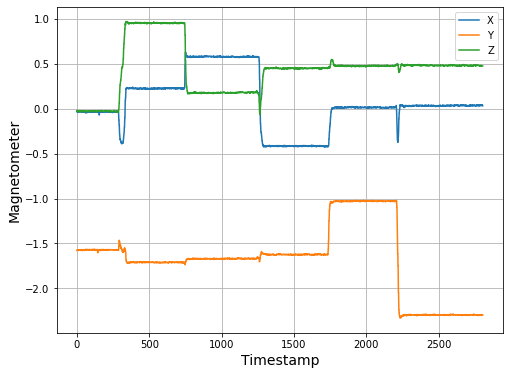

In [43]:
plot_mag(data)

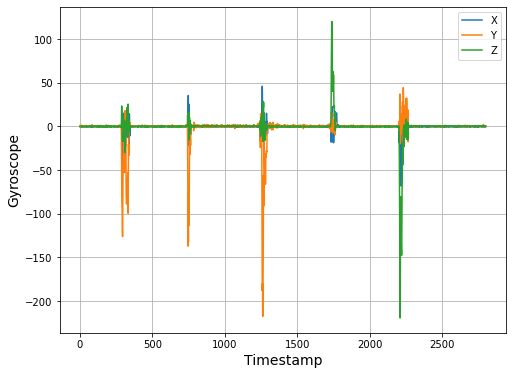

In [44]:
plot_gyro(data)

## Task 3 Camera Calibration

Use a pinhole camera model, the relationship between the image height (px) and ture height (cm) 

image_height = focal_length*true_height / distance + bias

so the image height varies linearly w.r.t the inverse of distance

In [45]:
file_path = "Dataset/data/task3/camera_module_calibration_task3.csv"
data = pd.read_csv(file_path, header=None).to_numpy()

In [46]:
height_cm = 11.5
dist_offset_cm = 1.7 + 5 # actually does not matter, since we want the slope
dist_cm, height_px = data[:, 0], data[:, 1]

In [47]:
slope, bias = np.polyfit(1/height_px, dist_cm+dist_offset_cm, deg=1)

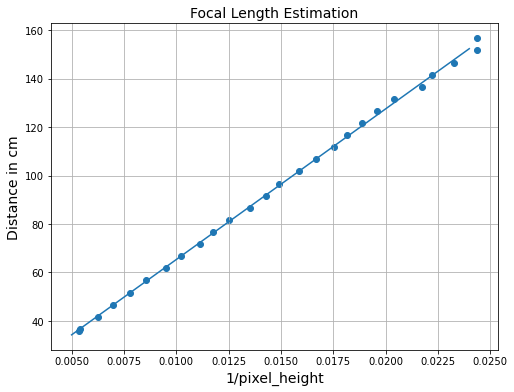

In [48]:
xs = np.arange(0.005, 0.025, 0.001)
ys = np.polyval([slope, bias], xs)
plt.figure(figsize=fig_size)
plt.plot(xs, ys)
plt.scatter(1/height_px, dist_cm+dist_offset_cm)
plt.ylabel("Distance in cm", fontsize=font_size)
plt.xlabel("1/pixel_height", fontsize=font_size)
plt.title("Focal Length Estimation", fontsize=font_size)
plt.grid()
plt.show()

In [49]:
focal_length = slope/height_cm
print("The estimated focal length is {:.2f} px".format(focal_length))

The estimated focal length is 540.95 px


## Task 4 Motor Control 

From mid value theorem of integration, we know there exists a point between (a, b) that the derivative of the function f is equal to 

(f(a) - f(b))/(a - b).

In our case the function f is the robot's position, and derivative is its velocity.

Now we know the robot's velocity equals to the mean dx/dt at sometime between a and b, so we just choose the mid point of (a, b)


In [50]:
file_path = "Dataset/data/task4/robot_speed_task4.csv"
data = pd.read_csv(file_path, header=None).to_numpy()
data = np.vstack(([0, 0], data))
# data

In [51]:
dist, delta_t = data[:, 0], data[:,1]
time = np.cumsum(delta_t)

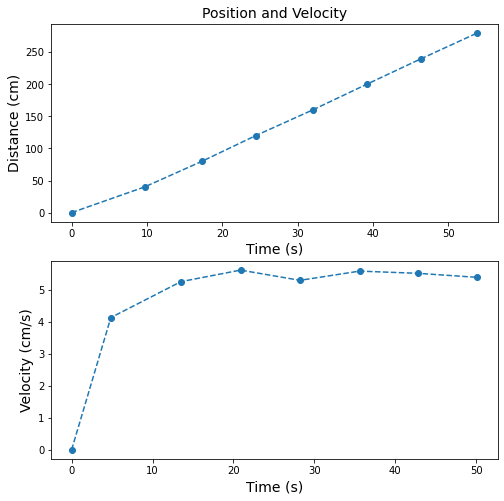

In [52]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.plot(time, dist, "o--")
plt.xlabel("Time (s)", fontsize=font_size)
plt.ylabel("Distance (cm)", fontsize=font_size)
plt.title("Position and Velocity", fontsize=font_size)

plt.subplot(212)
delta_x = np.correlate(dist, np.array([-1, 1]))
velo = delta_x/delta_t[1:]
velo = np.hstack((0, velo))
pad_time = np.hstack((0, time))
mid_point = np.correlate(pad_time, np.array([1, 1])*0.5)
plt.xlabel("Time (s)", fontsize=font_size)
plt.ylabel("Velocity (cm/s)", fontsize=font_size)
plt.plot(mid_point, velo, "o--")
plt.show()